In [1]:
import pandas as pd
df = pd.read_csv('StudentPerformanceFactors.csv')

In [2]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Checking and Removing Entries with Missing Values

In [3]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Normalization of Numerical Features

In [6]:
X = df.drop(columns = 'Exam_Score')
Y = df['Exam_Score']
features_to_be_scaled = []
for feature in X:
    if X[feature].nunique() > 5 and (X[feature].dtype == 'int64' or X[feature].dtype == 'float64'):
        features_to_be_scaled.append(feature)

features_to_be_scaled

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity']

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for feature in features_to_be_scaled:
    X[feature] = scaler.fit_transform(X[feature].values.reshape(-1, 1))

### One-Hot Encoding of Categorical Features

In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

cat_features = []

for feature in X:
    if X[feature].nunique() >= 2 and X[feature].dtype == 'O':
        cat_features.append(feature)

X = pd.get_dummies(X, columns = cat_features)

In [9]:
df_new = pd.concat([X, Y], axis = 1)

In [10]:
df_new.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,...,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male,Exam_Score
0,0.511628,0.600,0.500000,0.46,0.000,0.500000,False,True,False,True,...,False,False,True,False,False,False,True,False,True,67
1,0.418605,0.100,0.666667,0.18,0.250,0.666667,False,True,False,False,...,False,True,False,False,False,True,False,True,False,61
2,0.534884,0.950,0.500000,0.82,0.250,0.666667,False,False,True,False,...,False,False,False,True,False,False,True,False,True,74
3,0.651163,0.725,0.666667,0.96,0.125,0.666667,False,True,False,False,...,False,False,True,False,False,True,False,False,True,71
4,0.418605,0.800,0.333333,0.30,0.375,0.666667,False,False,True,False,...,False,True,False,False,False,False,True,True,False,70


/var/folders/jb/1sj9kb_j2k7c0d477x84_4h40000gn/T/ipykernel_11451/544215739.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


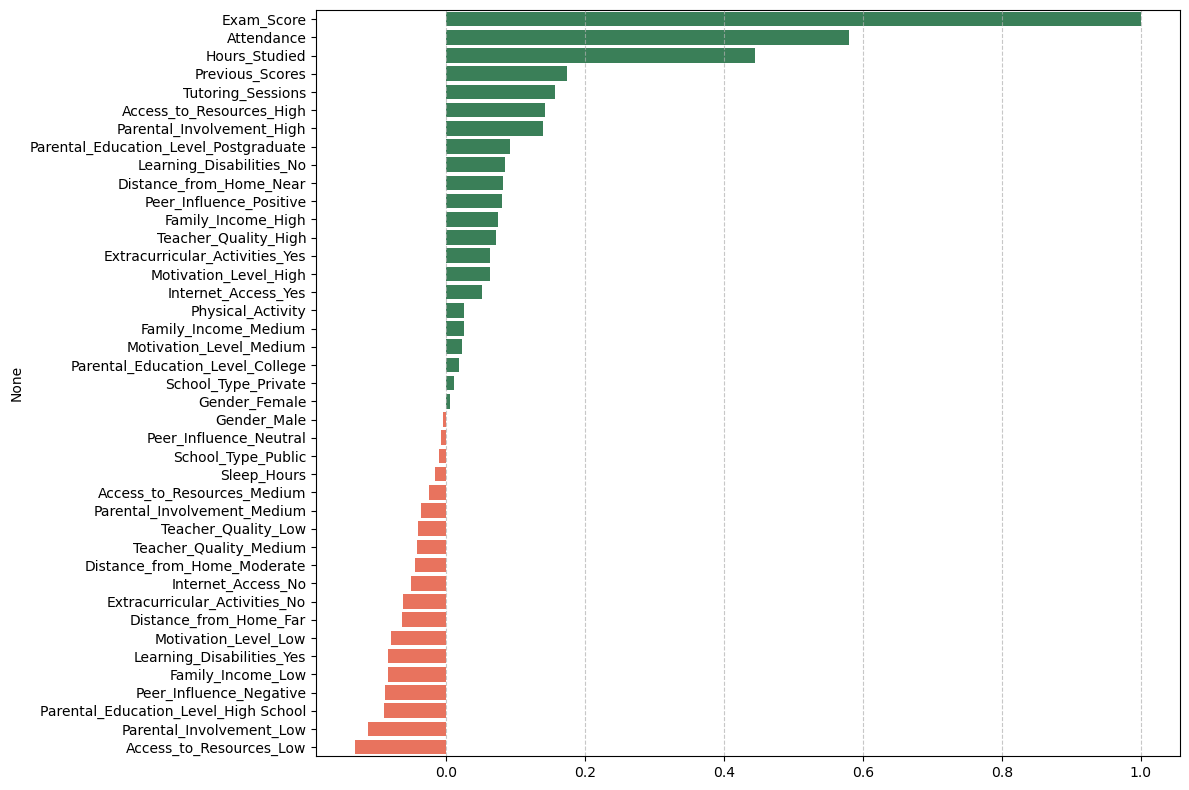

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_mtx = df_new.corr()
corr_score = corr_mtx["Exam_Score"].sort_values(ascending=False)

plt.figure(figsize=(12, 8), dpi=100)
sns.barplot(
    x = corr_score.values,
    y = corr_score.index,
    palette=["#2E8B57" if val > 0 else "#FF6347" for val in corr_score.values]
)


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
corr_mtx['Exam_Score']

Hours_Studied                            0.445104
Attendance                               0.580259
Sleep_Hours                             -0.017171
Previous_Scores                          0.174283
Tutoring_Sessions                        0.156829
Physical_Activity                        0.025148
Parental_Involvement_High                0.139715
Parental_Involvement_Low                -0.112410
Parental_Involvement_Medium             -0.036191
Access_to_Resources_High                 0.141636
Access_to_Resources_Low                 -0.131276
Access_to_Resources_Medium              -0.024579
Extracurricular_Activities_No           -0.063063
Extracurricular_Activities_Yes           0.063063
Motivation_Level_High                    0.062872
Motivation_Level_Low                    -0.080061
Motivation_Level_Medium                  0.022508
Internet_Access_No                      -0.051124
Internet_Access_Yes                      0.051124
Family_Income_High                       0.073603


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'StudentPerformanceFactors.csv'
data = pd.read_csv(file_path)

# Convert relevant columns to numeric
numeric_cols = ['Exam_Score', 'Hours_Studied', 'Attendance', 'Previous_Scores',
                'Sleep_Hours', 'Physical_Activity', 'Tutoring_Sessions']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Visualization 1: Distribution of Exam Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Exam_Score'], kde=True, bins=20, color='blue')
plt.title('Distribution of Exam Scores', fontsize=16)
plt.xlabel('Exam Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualization 2: Correlation Heatmap for Numerical Features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

# Visualization 3: Score Groups and Feature Comparison
# Define score groups: Low (<60), Medium (60-80), High (>80)
data['Score_Group'] = pd.cut(data['Exam_Score'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])

# Boxplot of Hours Studied for each Score Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score_Group', y='Hours_Studied', data=data, palette='Set2')
plt.title('Hours Studied Across Score Groups', fontsize=16)
plt.xlabel('Score Group', fontsize=12)
plt.ylabel('Hours Studied', fontsize=12)
plt.show()

# Visualization 4: Boxplots for Categorical Features
# Gender and Exam Scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Exam_Score', data=data, palette='Set3')
plt.title('Exam Scores by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.show()

# School Type and Exam Scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='School_Type', y='Exam_Score', data=data, palette='Set3')
plt.title('Exam Scores by School Type', fontsize=16)
plt.xlabel('School Type', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/StudentPerformanceFactors.csv'

### Linear Regression Inference

In [13]:
X = df_new.drop(columns = 'Exam_Score')
Y = df_new['Exam_Score']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(mean_squared_error(Y_test, Y_pred))

4.268430703859718


### Ridge Regression Inference

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha = {'alpha': [10e-4, 10e-3, 10e-2, 10e-1, 10, 10e1, 10e2, 10e3]}

grid_search = GridSearchCV(Ridge(), alpha, cv = 5)
grid_search.fit(X_train, Y_train)

print(f"Best value of alpha: {grid_search.best_params_['alpha']}")

Best value of alpha: 0.1


In [18]:
model = Ridge(alpha = grid_search.best_params_['alpha'])
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

mean_squared_error(Y_test, Y_pred)

4.1732354777735665

### Lasso Regression Inference

In [19]:
from sklearn.linear_model import Lasso

grid_search = GridSearchCV(Lasso(), alpha, cv = 5)
grid_search.fit(X_train, Y_train)

print(f"Best value of alpha: {grid_search.best_params_['alpha']}")

Best value of alpha: 0.001


In [21]:
model = Lasso(alpha = grid_search.best_params_['alpha'])
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

mean_squared_error(Y_test, Y_pred)

4.172812291330046

### Decision Tree Inference

In [22]:
from sklearn.tree import DecisionTreeRegressor

dt_params = {'max_depth' : [5, 10, 15], 'min_samples_split': [2, 5, 7, 10], 'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state = 42), dt_params, cv = 5)
grid_search.fit(X_train, Y_train)

print(f"Best Decision Tree parameters: {grid_search.best_params_}")

Best Decision Tree parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [23]:
Y_pred = grid_search.best_estimator_.predict(X_test)
mean_squared_error(Y_test, Y_pred)

7.52289311984511

### Random Forest Inference

In [24]:
from sklearn.ensemble import RandomForestRegressor

dt_params = {'n_estimators' : [50, 100, 200], 'min_samples_split': [2, 5, 7, 10], 'max_depth': [5, 10, 20], 'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(RandomForestRegressor(random_state = 42), dt_params, cv = 5)
grid_search.fit(X_train, Y_train)

print(f"Best Random Forest parameters: {grid_search.best_params_}")

Best Random Forest parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [27]:
Y_pred = grid_search.best_estimator_.predict(X_test)
mean_squared_error(Y_test, Y_pred)

5.349267220493308